In [1]:
"""
Machine Learning:
1. Regression
- Number, quantitative decision
- Potential: numerical value (prediction)
- 한 그래프를 그려 예측하는 방법

2. Classification
- Categorical decision
- Nationality: categorical value (prediction)
- cluster화 시켜 그룹을 예측하는 방법
- Computer vision: 영상 분석, 정해진 Label 안에서 그룹을 예측한다.
"""

"""
Machine Learning
a.k.a. Neural Network

Background
1. 데이터 수 상당히 많음
2. 그에 따라서 그 데이터를 가지고 연산값이 너무 큼 (빅데이터) = computational cost

머신 러닝 도입 이전에는,
Linear regression, quadratic regression, ... 등 y = ax^2 + bx + c // y = ax + b

Equations -> Layer -> Network

Hidden layer:
1. 기계가 알아서 위와 같은 식을 만들어서 최적의 식을 만들어냄
2. 저희는 이 network가 또는 layer가 어떤 식을 사용하고, 어떤 방식으로 output을 만들어내는지 모름.

- Hyperparameter
1. User (저희)가 조정할 수 있는 파라미터 값
2. 조정한 값이 다르면, 결과가 달라지는 경향이 있음
ex) epoch, learning rate, ...

- Paramter
1. model / network에 있는 variable

- Weights
1. neuron 들의 variable

"""

'\nMachine Learning\na.k.a. Neural Network\n\nBackground\n1. 데이터 수 상당히 많음\n2. 그에 따라서 그 데이터를 가지고 연산값이 너무 큼 (빅데이터) = computational cost\n\n머신 러닝 도입 이전에는,\nLinear regression, quadratic regression, ... 등 y = ax^2 + bx + c // y = ax + b\n\nEquations -> Layer -> Network\n\nHidden layer:\n1. 기계가 알아서 위와 같은 식을 만들어서 최적의 식을 만들어냄\n2. 저희는 이 network가 또는 layer가 어떤 식을 사용하고, 어떤 방식으로 output을 만들어내는지 모름.\n\n- Hyperparameter\n1. User (저희)가 조정할 수 있는 파라미터 값\n2. 조정한 값이 다르면, 결과가 달라지는 경향이 있음\nex) epoch, learning rate, ...\n\n- Paramter\n1. model / network에 있는 variable\n\n- Weights\n1. neuron 들의 variable\n\n'

In [2]:
import torch
import torch.nn.functional as F

class LinearRegression(torch.nn.Module):
    def __init__(self, inputSize, hiddenSize, outputSize):
        super(LinearRegression, self).__init__()
        self.hidden = torch.nn.Linear(inputSize, hiddenSize)
        self.predict = torch.nn.Linear(hiddenSize, outputSize)
    
    def forward(self, x):
        out = self.hidden(x)
        out = F.relu(out)       #ReLU: REctified Linear Unit
        out = self.predict(out)
        return out

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

csv_15 = pd.read_csv('./players_15.csv')

#input_columns = ['overall', 'age', 'height_cm', 'weight_kg', 'international_reputation', 'weak_foot', 'skill_moves']
input_columns = ['overall']

x_train = csv_15[input_columns].to_numpy()
y_train = csv_15['potential'].to_numpy()

x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

In [4]:
inputDim = len(input_columns)       # 1
hiddenDim = 5
outputDim = 1

"""
Network Structure
Output layer:    o
Hidden layer: o o o o o
Input layer:     o
"""

learningRate = 0.00001
epochs = 100
#num of iteration

In [5]:
#MSE: Mean Square Error
#RMSE: Root Mean Square Error

#SGD: Stochastic Gradient Descent

model = LinearRegression(inputDim, hiddenDim, outputDim)
print(model)

criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

LinearRegression(
  (hidden): Linear(in_features=1, out_features=5, bias=True)
  (predict): Linear(in_features=5, out_features=1, bias=True)
)


In [6]:
"""
Converge: loss 값이 더 이상 변하지 않을 때
 = 이미 최적화가 되어 loss 값이 최소화되었을 때

Converge 잘못 되었을때:
1. Overfitting
2. Underfitting
"""

total_loss = []

#training phase
for epoch in range(epochs):
    if torch.cuda.is_available():
        inputs = torch.from_numpy(x_train).float().cuda()
        labels = torch.from_numpy(y_train).float().cuda()
    else:
        inputs = torch.from_numpy(x_train).float()
        labels = torch.from_numpy(y_train).float()

    #optimizer 초기화
    optimizer.zero_grad()

    #현재 모델에 입력값을 대입하여 예측값 생산
    outputs = model(inputs)

    #Loss function을 이용한 loss 계산
    loss = criterion(outputs, labels)

    #Backward Propagation: Loss에 따라 weight를 얼마만큼 조정해야 되는지 계산
    loss.backward()
    optimizer.step()

    total_loss.append(loss.item())
    print('Epoch {}, Loss {}'.format(epoch, np.round(loss.item(), 5)))

Epoch 0, Loss 8222.18945
Epoch 1, Loss 6809.77539
Epoch 2, Loss 5768.64746
Epoch 3, Loss 4945.16309
Epoch 4, Loss 4258.14844
Epoch 5, Loss 3662.53711
Epoch 6, Loss 3133.08521
Epoch 7, Loss 2656.31201
Epoch 8, Loss 2225.79395
Epoch 9, Loss 1839.25549
Epoch 10, Loss 1496.45923
Epoch 11, Loss 1197.66248
Epoch 12, Loss 942.56665
Epoch 13, Loss 729.71954
Epoch 14, Loss 556.32794
Epoch 15, Loss 418.44437
Epoch 16, Loss 311.33698
Epoch 17, Loss 229.96555
Epoch 18, Loss 169.40579
Epoch 19, Loss 125.16963
Epoch 20, Loss 93.3892
Epoch 21, Loss 70.8906
Epoch 22, Loss 55.16283
Epoch 23, Loss 44.28775
Epoch 24, Loss 36.83681
Epoch 25, Loss 31.77158
Epoch 26, Loss 28.35053
Epoch 27, Loss 26.05236
Epoch 28, Loss 24.51543
Epoch 29, Loss 23.49137
Epoch 30, Loss 22.81111
Epoch 31, Loss 22.36034
Epoch 32, Loss 22.06224
Epoch 33, Loss 21.86544
Epoch 34, Loss 21.73568
Epoch 35, Loss 21.65022
Epoch 36, Loss 21.59399
Epoch 37, Loss 21.55701
Epoch 38, Loss 21.53271
Epoch 39, Loss 21.51674
Epoch 40, Loss 21.50

[[99.56525 ]
 [98.48576 ]
 [96.3268  ]
 ...
 [42.352726]
 [42.352726]
 [42.352726]]


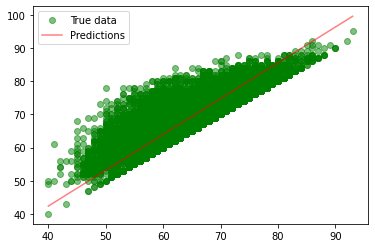

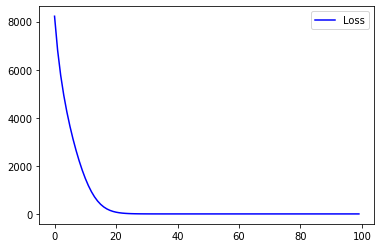

In [7]:
with torch.no_grad():
    if torch.cuda.is_available():
        predicted = model(torch.from_numpy(x_train).float().cuda()).cpu().data.numpy()
    else:
        predicted = model(torch.from_numpy(x_train).float()).data.numpy()
    print(predicted)

plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '-r', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

plt.clf()
plt.plot(total_loss, '-b', label='Loss')
plt.legend(loc='best')
plt.show()

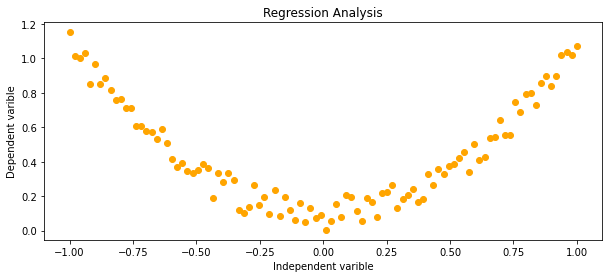

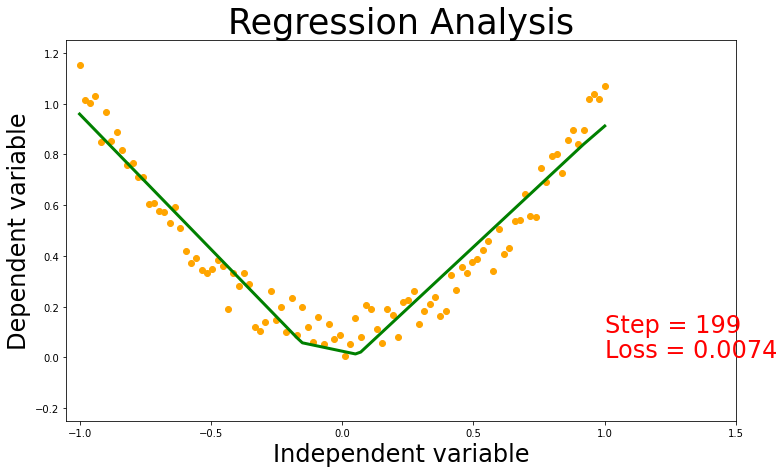

In [13]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import imageio


torch.manual_seed(1)    # reproducible

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)
#y = x^2 + b

# torch can only train on Variable, so convert them to Variable
x, y = Variable(x), Variable(y)

# view data
plt.figure(figsize=(10,4))
plt.scatter(x.data.numpy(), y.data.numpy(), color = "orange")
plt.title('Regression Analysis')
plt.xlabel('Independent varible')
plt.ylabel('Dependent varible')
plt.show()

# this is one way to define a network
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

net = Net(n_feature=1, n_hidden=10, n_output=1)     # define the network
# print(net)  # net architecture
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

my_images = []
fig, ax = plt.subplots(figsize=(12,7))

# train the network
for t in range(200):
  
    prediction = net(x)     # input x and predict based on x

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients
    
    # plot and show learning process
    plt.cla()
    ax.set_title('Regression Analysis', fontsize=35)
    ax.set_xlabel('Independent variable', fontsize=24)
    ax.set_ylabel('Dependent variable', fontsize=24)
    ax.set_xlim(-1.05, 1.5)
    ax.set_ylim(-0.25, 1.25)
    ax.scatter(x.data.numpy(), y.data.numpy(), color = "orange")
    ax.plot(x.data.numpy(), prediction.data.numpy(), 'g-', lw=3)
    ax.text(1.0, 0.1, 'Step = %d' % t, fontdict={'size': 24, 'color':  'red'})
    ax.text(1.0, 0, 'Loss = %.4f' % loss.data.numpy(),
            fontdict={'size': 24, 'color':  'red'})

    # Used to return the plot as an image array 
    # (https://ndres.me/post/matplotlib-animated-gifs-easily/)
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    my_images.append(image)
    
   


# save images as a gif    
imageio.mimsave('./curve_1.gif', my_images, fps=10)

In [5]:
csv_15 = pd.read_csv('./players_15.csv')
csv_16 = pd.read_csv('./players_16.csv')
csv_17 = pd.read_csv('./players_17.csv')
csv_18 = pd.read_csv('./players_18.csv')
csv_19 = pd.read_csv('./players_19.csv')
csv_20 = pd.read_csv('./players_20.csv')


print("number of players on 2015: ", len(csv_15))
print("number of players on 2016: ", len(csv_16))
print("number of players on 2017: ", len(csv_17))
print("number of players on 2018: ", len(csv_18))
print("number of players on 2019: ", len(csv_19))
print("number of players on 2020: ", len(csv_20))

csv_total = pd.concat([csv_15, csv_16, csv_17, csv_18, csv_19, csv_20], axis=0, ignore_index=True)
#print(csv_total.head())
print("total number of players: ", len(csv_total))


number of players on 2015:  15465
number of players on 2016:  14881
number of players on 2017:  17009
number of players on 2018:  17592
number of players on 2019:  17770
number of players on 2020:  18278
total number of players:  100995


In [10]:
"""
range(start, end, step)
start: inclusive 현재 들어간 값 포함 
end: exclusvie 현재 들어간 값 미포함 

./players_20.csv
"""
import pandas as pd
tmp = []
for i in range (15, 21):
    total = "./players_" + str(i) + ".csv"
    csv_DF = pd.read_csv(total)
    tmp.append(csv_DF)
    print("total number of players: ", len(csv_DF1))
csv_DF1 = pd.concat([csv_DF], axis=0, ignore_index=True)
print("total number of players: ", len(csv_DF1))

total number of players:  18278
total number of players:  18278
total number of players:  18278
total number of players:  18278
total number of players:  18278
total number of players:  18278
total number of players:  18278


In [11]:
"""
Dataset:
1. traing set: 이 데이터로 학습 시키는 (80%)
2. test set: 이 데이터로 정확도 테스트 (20%)

train_test_split: 전체 데이터에서 무작위로 80%, 20% 로 나눠주는 함수
"""
from sklearn.model_selection import train_test_spilt

input_columns = ['overall', 'age', 'height_cm', 'weight_kg' 'international_reputation', 'weak_foot', 'skill_moves']
#input_columns = ['overall']

x_train = csv_total[input_columns]
y_train = csv_total["potential"]

#x_train = np.reshape(x_train, -1)
#y_train = np.reshape(y_train, -1)

#x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=0)

print(np.shape(x_train))
print(np.shape(y_train))

ImportError: cannot import name 'train_test_spilt' from 'sklearn.model_selection' (/Users/minjeonghyeon/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/__init__.py)